import all the libraries

In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode

In [4]:
netflix=pd.read_csv('netflix1.csv')
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
netflix.tail(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [8]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [39]:
netflix_movies=netflix[netflix['type']=='Movie']
netflix_shows=netflix[netflix['type']=='TV Show']

In [13]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])

netflix['month_added']=netflix['date_added'].dt.month
netflix['month_name_added']=netflix['date_added'].dt.month_name()

netflix.head(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,9,September,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",9,September,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",9,September,2021


Okay, let's visualize

1 .Analysis of Movies vs TV Shows.

In [49]:
group_netflix=netflix.type.value_counts()

# Use `hole` to create a donut-like pie chart

trace=go.Pie(labels=group_netflix.index,values=group_netflix.values,pull=[0.05]) # Actual Data

layout = go.Layout(title="TV Shows VS Movies", height=400, legend=dict(x=1.1, y=1.3)) # layout for data

fig = go.Figure(data=[trace],layout=layout)

fig.update_layout(height=500,width=700)
fig.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_13628\364173691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="type", data=netflix, palette="Set2")


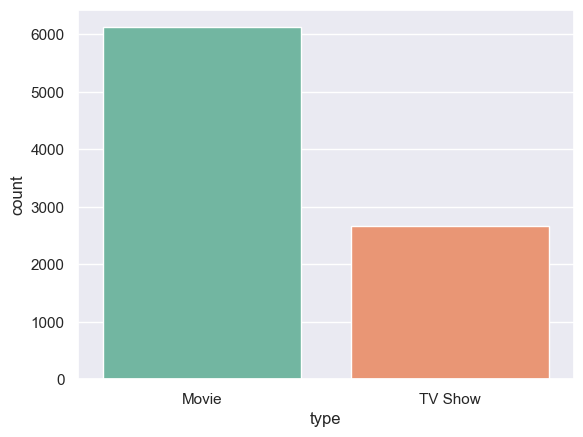

In [19]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix, palette="Set2")

2. Movie ratings analysis

C:\Users\dell\AppData\Local\Temp\ipykernel_13628\3251300679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="rating", data=netflix, palette="Set2", order=netflix['rating'].value_counts().index[0:15])


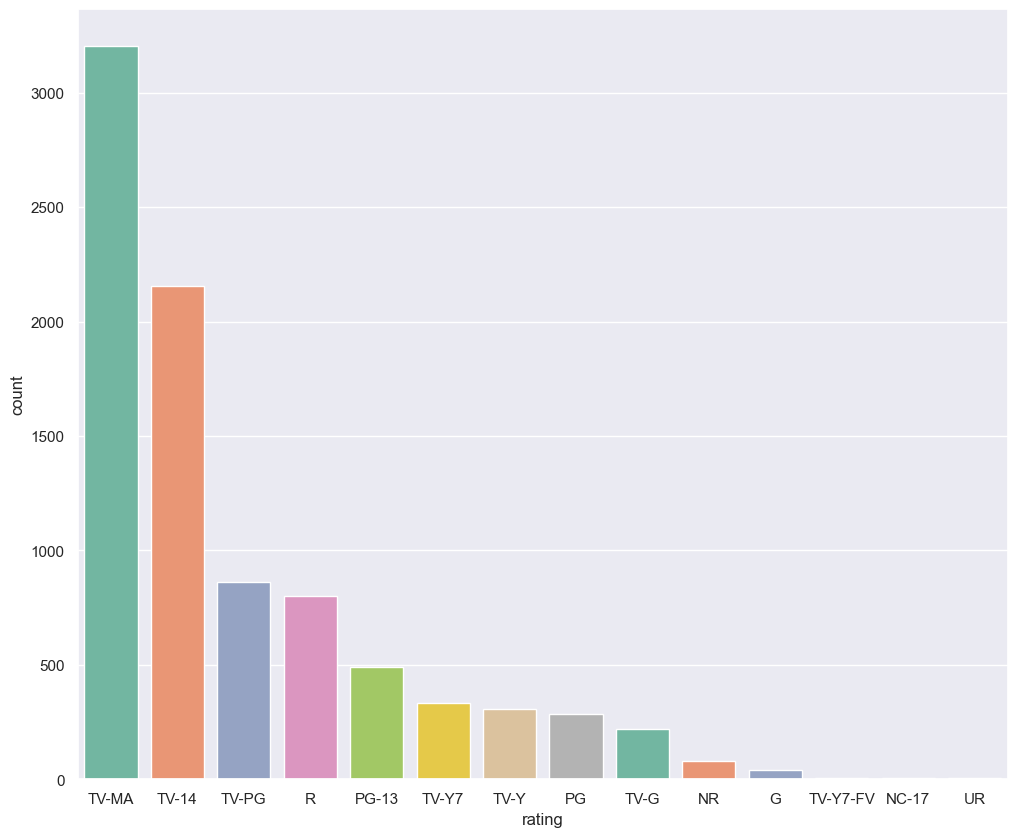

In [21]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix, palette="Set2", order=netflix['rating'].value_counts().index[0:15])

3.  Countries with highest rated content.

In [28]:
import plotly.express as px
data = dict(
    number=[1063,619,135,60,44,41,40,40,38,35],
    country=["United States", "India", "United Kingdom", "Canada", "Spain",'Turkey','Philippines','France','South Korea','Australia'])
fig = px.funnel(data, x='number', y='country')
fig.show()

Year wise analysis

In [50]:
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['year_added'] = netflix['date_added'].dt.year


movie_per_year=[]

tv_shows_per_year=[]
for i in range(2010,2020):
    h=netflix.loc[(netflix['type']=='Movie') & (netflix.year_added==i)] 
    g=netflix.loc[(netflix['type']=='TV Show') & (netflix.year_added==i)] 
    movie_per_year.append(len(h))
    tv_shows_per_year.append(len(g))

    

trace1 = go.Scatter(x=[i for i in range(2008,2020)],y=movie_per_year,mode='lines+markers',name='Movies')

trace2=go.Scatter(x=[i for i in range(2008,2020)],y=tv_shows_per_year,mode='lines+markers',name='TV Shows')

data=[trace1,trace2]

layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))

fig = go.Figure(data, layout=layout)

fig.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_13628\2338652385.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




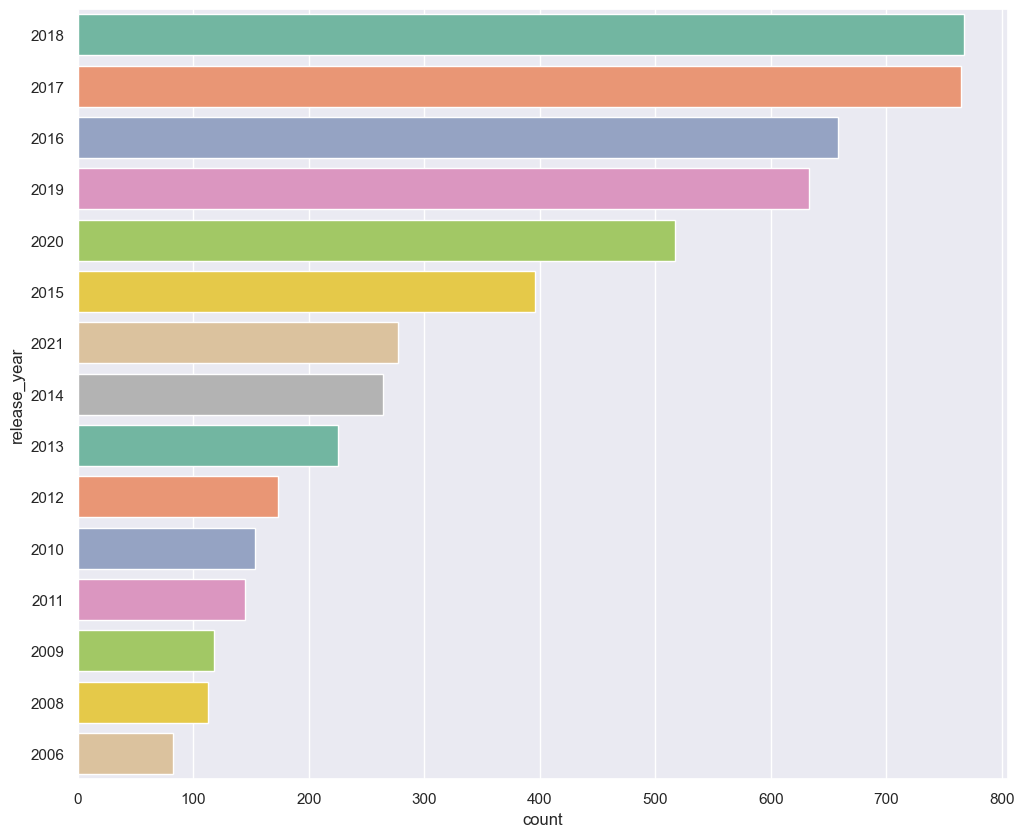

In [33]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_movies, palette="Set2", order=netflix_movies['release_year'].value_counts().index[0:15])

Top 10 Movie Directors

In [51]:
def country_top_dir(country):
    indian_dir=netflix.loc[(netflix.country==str(country)) & (netflix.type=="Movie")]
    # indian_dir.director.value_counts()[:12]

    col = "director"
    categories = ", ".join(indian_dir[col].fillna("")).split(", ")

    directors=pd.Series(categories)
    directors=directors.value_counts()[1:16]

    trace=go.Bar(x=directors.values[:10][::-1],y=directors.index[:10][::-1],orientation='h',marker=dict(color='#a678de'))
    return trace
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_top_dir(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()